<div dir="rtl" lang="he" xml:lang="he">

# שכבת Embedding Layer 
שכבת הטמעה לוקחת יצוג של מילה שהוא מספר בודד ומציגה אותו כוקטור מספרים. 
יצוג מאפשר למפות מילים למספרים בצורה יותר חכמה, לדוגמה, מילים דומות יכולות להיות קרובות מבחינה וקטורית

In [16]:
import torch
from torchtext import vocab
sentence_1 = "הוא הלך לפארק"
sentence_2 = "הם נסעו לבית"
sentence_3 = "אבא ילך לחנות"
sentence_4 = "היא הגיעה לבית-ספר"
sentences = [sentence_1, sentence_2, sentence_3, sentence_4]
words = " ".join(sentences).split()
dictionary = vocab.vocab({words[i]:i+1 for i in range(len(words))})
dictionary.set_default_index(0)


In [17]:
print(dictionary(sentence_1.split()))
print(dictionary(sentence_4.split()))

[0, 1, 2]
[9, 10, 11]


In [18]:
embedding = torch.nn.Embedding(len(words),2)
senten_as_num = torch.tensor(dictionary(sentence_1.split()))
senten_as_vecotr = embedding(senten_as_num)
print(f"""
{senten_as_num=},
{senten_as_vecotr=}
""")


senten_as_num=tensor([0, 1, 2]),
senten_as_vecotr=tensor([[-1.5683, -1.3102],
        [ 0.2694,  0.1308],
        [-0.0768, -1.4258]], grad_fn=<EmbeddingBackward0>)



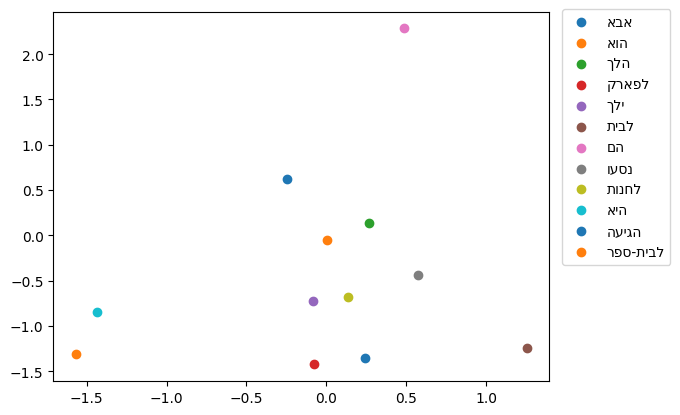

In [25]:
import matplotlib.pyplot as plt 
fig,axis = plt.subplots(1)
for word in dictionary.get_stoi():
    word_token = torch.tensor(dictionary([word]))
    word_vector = embedding(word_token).detach()[0]
    axis.scatter(*word_vector,label= word[::-1])   # reverse the word becuase is hebrow
fig.legend(bbox_to_anchor=(1.1, 0.9))
    